# 한강 다리 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

from geopy.distance import geodesic

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [34]:
bridge_df = pd.read_excel('../data/added_features/한강_대교_정보.xlsx')

In [35]:
bridge_df

,대교,좌표X,좌표Y
0,행주대교,127.086139,37.587694
1,방화대교,126.810750,37.570694
2,가양대교,126.861000,37.567611
3,월드컵대교,126.894083,37.571611
4,성산대교,126.914556,37.550278
5,양화대교,126.891861,37.541611
6,서강대교,126.935083,37.553774
7,마포대교,126.945389,37.540889
8,원효대교,126.957111,37.541611
9,한강대교,127.019864,37.522611


In [36]:
# 구리대교 제거
bridge_df.drop(25, inplace=True)
bridge_df.reset_index(drop=True, inplace=True)
bridge_df

,대교,좌표X,좌표Y
0,행주대교,127.086139,37.587694
1,방화대교,126.810750,37.570694
2,가양대교,126.861000,37.567611
3,월드컵대교,126.894083,37.571611
4,성산대교,126.914556,37.550278
5,양화대교,126.891861,37.541611
6,서강대교,126.935083,37.553774
7,마포대교,126.945389,37.540889
8,원효대교,126.957111,37.541611
9,한강대교,127.019864,37.522611


In [37]:
loc_list = [(126.8096129301235, 37.598189329122825),
            (126.82607892190346, 37.587943446432746),
            (126.86170843333504, 37.570439217074366),
            (126.88541016946503, 37.55663881948525),
            (126.89179805026869, 37.553315661202184),
            (126.90502773457551, 37.54431706016002),
            (126.925108766726, 37.53724964581146),
            (126.93597408863835, 37.533363713991186),
            (126.9455050720131, 37.527043466778544),
            (126.95854313320729, 37.51721882386227),
            (126.95201461120291, 37.51995540172078),
            (126.98178998943413, 37.51062934642769),
            (126.99642566527385, 37.514739275096666),
            (127.01308918067669, 37.526983233748595),
            (127.0213502788332, 37.53604610224124),
            (127.034973441168, 37.53737633420805),
            (127.0570765935656, 37.530051592826304),
            (127.06433700703002, 37.52673217474442),
            (127.09144041057381, 37.52466001586481),
            (127.09909292218002, 37.52854617056028),
            (127.10403320872408, 37.534092087944174),
            (127.11273555752798, 37.54280577919307),
            (127.11418651247196, 37.54449826315836),
            (127.13174701251226, 37.56940154801608),
            (127.14800227682981, 37.57254027441423), 
            (127.16130312540636, 37.57776663342351)
            ]

X_list = []
Y_list = []

for i in range(len(loc_list)):
    X_list.append(loc_list[i][0])
    Y_list.append(loc_list[i][1])

In [38]:
X_list

[126.8096129301235,
 126.82607892190346,
 126.86170843333504,
 126.88541016946503,
 126.89179805026869,
 126.90502773457551,
 126.925108766726,
 126.93597408863835,
 126.9455050720131,
 126.95854313320729,
 126.95201461120291,
 126.98178998943413,
 126.99642566527385,
 127.01308918067669,
 127.0213502788332,
 127.034973441168,
 127.0570765935656,
 127.06433700703002,
 127.09144041057381,
 127.09909292218002,
 127.10403320872408,
 127.11273555752798,
 127.11418651247196,
 127.13174701251226,
 127.14800227682981,
 127.16130312540636]

In [40]:
bridge_df['좌표X'] = X_list
bridge_df['좌표Y'] = Y_list

bridge_df[['대교', '좌표Y', '좌표X']]

,대교,좌표Y,좌표X
0,행주대교,37.598189,126.809613
1,방화대교,37.587943,126.826079
2,가양대교,37.570439,126.861708
3,월드컵대교,37.556639,126.885410
4,성산대교,37.553316,126.891798
5,양화대교,37.544317,126.905028
6,서강대교,37.537250,126.925109
7,마포대교,37.533364,126.935974
8,원효대교,37.527043,126.945505
9,한강대교,37.517219,126.958543


# geopy를 사용하여 아파트와 다리 사이의 거리 계산

In [41]:
df = pd.read_csv('../data/preprocessed/24_apart_const_category.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_58077/2881595915.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/24_apart_const_category.csv')


In [42]:
# '좌표X', '좌표Y'를 합쳐서 하나의 변수 '좌표X,좌표Y'생성

df['좌표X,좌표Y'] = df['좌표X'].astype(str)+','+df['좌표Y'].astype(str)
print(len(df['좌표X,좌표Y'].unique()))

loc_df = pd.DataFrame(df['좌표X,좌표Y'].unique(), columns=['좌표X,좌표Y']) # '좌표X,좌표Y' 부분만 추출

# 좌표 X, Y 다시 분리

loc_df[['좌표X', '좌표Y']] = loc_df['좌표X,좌표Y'].apply(lambda x: pd.Series(x.split(',')))

loc_df['좌표X'] = loc_df['좌표X'].astype(float)
loc_df['좌표Y'] = loc_df['좌표Y'].astype(float)

loc_df

8921


,"좌표X,좌표Y",좌표X,좌표Y
0,"127.05721,37.476763",127.057210,37.476763
1,"127.0559898,37.4838941",127.055990,37.483894
2,"127.0766243,37.4962963",127.076624,37.496296
3,"127.0585214,37.4800022",127.058521,37.480002
4,"127.0680279,37.4878016",127.068028,37.487802
...,...,...,...
8916,"126.960783522562,37.5003136768081",126.960784,37.500314
8917,"126.935945913625,37.5448750548629",126.935946,37.544875
8918,"127.063427393682,37.5487159907398",127.063427,37.548716
8919,"126.9966,37.5645412",126.996600,37.564541


In [43]:
m = 1500
apart_loc = (loc_df.iloc[4]['좌표Y'], loc_df.iloc[4]['좌표X']) # 아파트 위치 정보
re = bridge_df.apply(lambda loc: geodesic(apart_loc, (loc['좌표Y'], loc['좌표X'])).meters, axis=1) # 아파트와 모든 지하철 정류장 사이의 거리를 구한다.

# 의미있는 정보 표시
print(f'1.5km 이하에 위치한 역 개수: {(re < m).sum()}')
shortest = bridge_df.iloc[re.idxmin()]
print(f'가장 가까운 다리와의 거리: {re.min()/1000:.2f}km')
print('가장 가까운 다리 이름:', shortest['대교'])

1.5km 이하에 위치한 역 개수: 0
가장 가까운 다리와의 거리: 4.33km
가장 가까운 다리 이름: 청담대교


In [44]:
def calculate_dist(loc_df, bridge_df):
    apart_loc = (loc_df['좌표Y'], loc_df['좌표X'])
    distances = bridge_df.apply(lambda loc: geodesic(apart_loc, (loc['좌표Y'], loc['좌표X'])).meters, axis=1)
    return distances

distances = loc_df.apply(calculate_dist, bridge_df=bridge_df, axis=1)

In [45]:
distances

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,25699.943450,23866.556024,20168.242849,17586.069738,16912.734275,15402.877040,13471.836991,12424.693946,11344.732049,9812.570408,...,5914.358195,5581.622466,6117.261555,6837.111348,7591.128711,8822.020457,9049.450022,12211.790164,13319.554804,14502.694592
1,25199.752726,23372.464581,19676.953444,17104.872137,16433.334909,14936.483616,12998.807094,11947.531340,10879.664134,9376.953502,...,5123.790540,4811.419486,5504.222983,6251.757347,7005.936457,8241.378971,8468.471877,11614.987226,12765.073771,13971.330292
2,26165.782045,24366.728423,20701.377602,18180.715510,17520.761642,16078.434989,14145.006835,13097.490898,12084.321064,10695.561485,...,4125.807538,3548.377712,3409.678423,4093.607948,4844.426473,6069.333610,6296.550252,9464.191214,10554.995103,11737.661411
3,25612.329055,23782.355500,20085.290322,17508.565507,16836.143676,15333.378128,13398.087502,12348.269810,11274.731891,9758.126422,...,5556.307320,5211.854255,5747.955022,6472.788277,7227.183150,8459.374334,8686.810424,11846.869890,12963.278896,14151.813557
4,25916.169571,24099.622710,20413.272351,17859.886841,17192.259337,15716.239354,13775.958011,12723.333584,11675.797417,10216.647196,...,4788.131417,4333.100590,4584.757638,5290.901887,6043.923648,7272.573862,7499.947206,10665.072497,11765.313198,12948.697064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,17217.888319,15372.191402,11715.572974,9136.045165,8472.824379,6938.618830,5172.188912,4273.845404,3259.702236,1886.682295,...,9130.456392,9613.186940,11863.302241,12622.816956,13207.268693,14236.402757,14420.137748,16944.721326,18386.374530,19696.670610
8917,12632.029737,10819.608918,7146.783283,4652.573515,4012.138486,2733.028689,1278.109498,1277.620522,2151.879855,3662.130401,...,10831.358959,11524.890892,13925.224191,14532.723863,14903.491424,15625.244196,15751.659963,17513.442087,18986.412032,20242.889670
8918,23084.212744,21415.727418,17985.241401,15754.743859,15174.657423,14006.376951,12289.938367,11392.091242,10696.040129,9907.579076,...,2146.212365,2441.258269,3641.194864,3866.157199,3938.584630,4406.531244,4509.966471,6458.284326,7926.564698,9228.949205
8919,16933.403671,15285.352986,11935.067328,9863.133398,9343.312000,8397.008228,7005.995302,6377.717391,6140.744871,6236.815174,...,6573.776115,7310.391708,9478.333378,9899.281424,10077.148580,10541.718059,10625.542948,11951.932096,13404.997041,14623.968751


In [46]:
loc_df['가장 가까운 다리와의 거리'] = distances.min(axis=1)
loc_df

,"좌표X,좌표Y",좌표X,좌표Y,가장 가까운 다리와의 거리
0,"127.05721,37.476763",127.057210,37.476763,5581.622466
1,"127.0559898,37.4838941",127.055990,37.483894,4811.419486
2,"127.0766243,37.4962963",127.076624,37.496296,3409.678423
3,"127.0585214,37.4800022",127.058521,37.480002,5211.854255
4,"127.0680279,37.4878016",127.068028,37.487802,4333.100590
...,...,...,...,...
8916,"126.960783522562,37.5003136768081",126.960784,37.500314,1886.682295
8917,"126.935945913625,37.5448750548629",126.935946,37.544875,1277.620522
8918,"127.063427393682,37.5487159907398",127.063427,37.548716,2146.212365
8919,"126.9966,37.5645412",126.996600,37.564541,3845.187558


In [47]:
min_idx = distances.idxmin(axis=1)
bridge_df.iloc[min_idx].reset_index()

,index,대교,좌표X,좌표Y
0,17,청담대교,127.064337,37.526732
1,17,청담대교,127.064337,37.526732
2,18,잠실대교,127.091440,37.524660
3,17,청담대교,127.064337,37.526732
4,17,청담대교,127.064337,37.526732
...,...,...,...,...
8916,9,한강대교,126.958543,37.517219
8917,7,마포대교,126.935974,37.533364
8918,16,영동대교,127.057077,37.530052
8919,14,동호대교,127.021350,37.536046


In [48]:
bridge_df.isna().sum()

대교     0
좌표X    0
좌표Y    0
dtype: int64

In [49]:
loc_df = pd.concat([loc_df, bridge_df.iloc[min_idx].reset_index()], axis=1)
loc_df

,"좌표X,좌표Y",좌표X,좌표Y,가장 가까운 다리와의 거리,index,대교,좌표X,좌표Y
0,"127.05721,37.476763",127.057210,37.476763,5581.622466,17,청담대교,127.064337,37.526732
1,"127.0559898,37.4838941",127.055990,37.483894,4811.419486,17,청담대교,127.064337,37.526732
2,"127.0766243,37.4962963",127.076624,37.496296,3409.678423,18,잠실대교,127.091440,37.524660
3,"127.0585214,37.4800022",127.058521,37.480002,5211.854255,17,청담대교,127.064337,37.526732
4,"127.0680279,37.4878016",127.068028,37.487802,4333.100590,17,청담대교,127.064337,37.526732
...,...,...,...,...,...,...,...,...
8916,"126.960783522562,37.5003136768081",126.960784,37.500314,1886.682295,9,한강대교,126.958543,37.517219
8917,"126.935945913625,37.5448750548629",126.935946,37.544875,1277.620522,7,마포대교,126.935974,37.533364
8918,"127.063427393682,37.5487159907398",127.063427,37.548716,2146.212365,16,영동대교,127.057077,37.530052
8919,"126.9966,37.5645412",126.996600,37.564541,3845.187558,14,동호대교,127.021350,37.536046


In [50]:
(distances<=1000).sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
8916    0
8917    0
8918    0
8919    0
8920    0
Length: 8921, dtype: int64

In [51]:
loc_df['인근 한강다리 개수'] = (distances<=1500).sum(axis=1)
loc_df

,"좌표X,좌표Y",좌표X,좌표Y,가장 가까운 다리와의 거리,index,대교,좌표X,좌표Y,인근 한강다리 개수
0,"127.05721,37.476763",127.057210,37.476763,5581.622466,17,청담대교,127.064337,37.526732,0
1,"127.0559898,37.4838941",127.055990,37.483894,4811.419486,17,청담대교,127.064337,37.526732,0
2,"127.0766243,37.4962963",127.076624,37.496296,3409.678423,18,잠실대교,127.091440,37.524660,0
3,"127.0585214,37.4800022",127.058521,37.480002,5211.854255,17,청담대교,127.064337,37.526732,0
4,"127.0680279,37.4878016",127.068028,37.487802,4333.100590,17,청담대교,127.064337,37.526732,0
...,...,...,...,...,...,...,...,...,...
8916,"126.960783522562,37.5003136768081",126.960784,37.500314,1886.682295,9,한강대교,126.958543,37.517219,0
8917,"126.935945913625,37.5448750548629",126.935946,37.544875,1277.620522,7,마포대교,126.935974,37.533364,2
8918,"127.063427393682,37.5487159907398",127.063427,37.548716,2146.212365,16,영동대교,127.057077,37.530052,0
8919,"126.9966,37.5645412",126.996600,37.564541,3845.187558,14,동호대교,127.021350,37.536046,0


### 원본에 적용

In [52]:
shortest_dist_mapping = pd.Series({locate: shortest_dist for locate, shortest_dist in zip(loc_df['좌표X,좌표Y'], loc_df['가장 가까운 다리와의 거리'])})

idx_mapping = pd.Series({locate: idx for locate, idx in zip(loc_df['좌표X,좌표Y'], loc_df['index'])})

bridge_name_mapping = pd.Series({locate: bridge_name for locate, bridge_name in zip(loc_df['좌표X,좌표Y'], loc_df['대교'])})

nums_mapping = pd.Series({locate: nums for locate, nums in zip(loc_df['좌표X,좌표Y'], loc_df['인근 한강다리 개수'])})

In [53]:
# 새로운 feature 추가
df[['가장 가까운 다리와의 거리', '가장 가까운 다리 index', '가장 가까운 다리', '인근 한강다리 개수']] = np.nan

In [54]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,NaN,NaN,NaN,NaN
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,NaN,NaN,NaN,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,NaN,NaN,NaN,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.459291,69.322000,기타,분당선,강남구,기타,NaN,NaN,NaN,NaN
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.459291,69.322000,기타,분당선,강남구,기타,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,-0.641286,50.938744,기타,기타,기타,기타,NaN,NaN,NaN,NaN
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,-0.641286,50.938744,기타,기타,기타,기타,NaN,NaN,NaN,NaN
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,-0.607676,50.991003,기타,기타,기타,기타,NaN,NaN,NaN,NaN
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,-0.225827,51.082553,기타,기타,기타,기타,NaN,NaN,NaN,NaN


In [55]:
# 원본에 적용

df['가장 가까운 다리와의 거리'] = df['가장 가까운 다리와의 거리'].fillna(df['좌표X,좌표Y'].map(shortest_dist_mapping))

df['가장 가까운 다리 index'] = df['가장 가까운 다리 index'].fillna(df['좌표X,좌표Y'].map(idx_mapping))

df['가장 가까운 다리'] = df['가장 가까운 다리'].fillna(df['좌표X,좌표Y'].map(bridge_name_mapping))

df['인근 한강다리 개수'] = df['인근 한강다리 개수'].fillna(df['좌표X,좌표Y'].map(nums_mapping))

In [56]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,1.243615,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.459291,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.459291,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,-0.641286,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,-0.641286,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,-0.607676,50.991003,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,-0.225827,51.082553,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0


In [57]:
tmp = df[df['인근 한강다리 개수'] >= 1]
tmp

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수
2303,서울특별시 강남구 신사동,658,658.0,0.0,로데오현대,55.080,201712,6,10,1998,...,1.243615,70.059000,기타,분당선,강남구,기타,1205.933190,15.0,성수대교,1.0
2304,서울특별시 강남구 신사동,658,658.0,0.0,로데오현대,84.960,201712,14,2,1998,...,1.243615,70.059000,기타,분당선,강남구,기타,1205.933190,15.0,성수대교,1.0
2305,서울특별시 강남구 신사동,658,658.0,0.0,로데오현대,90.940,201712,15,5,1998,...,1.243615,70.059000,기타,분당선,강남구,기타,1205.933190,15.0,성수대교,1.0
2306,서울특별시 강남구 신사동,658,658.0,0.0,로데오현대,90.940,201802,9,7,1998,...,2.088923,68.540300,기타,분당선,강남구,기타,1205.933190,15.0,성수대교,1.0
2307,서울특별시 강남구 신사동,658,658.0,0.0,로데오현대,55.080,201802,13,9,1998,...,2.088923,68.540300,기타,분당선,강남구,기타,1205.933190,15.0,성수대교,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127414,서울특별시 용산구 한남동,644-2,644.0,2.0,태성1,59.950,202307,22,3,1975,...,-0.531937,50.938744,기타,경원선,용산구,기타,1023.539348,13.0,한남대교,1.0
1127415,서울특별시 용산구 한남동,410,410.0,0.0,파르크한남,268.670,202308,17,4,2020,...,-0.120261,50.991003,기타,경원선,용산구,기타,515.550510,13.0,한남대교,2.0
1127416,서울특별시 용산구 한남동,828,828.0,0.0,한남아이파크애비뉴,45.717,202309,4,4,2017,...,0.279757,51.082553,파크,경원선,용산구,기타,791.238072,13.0,한남대교,2.0
1127417,서울특별시 용산구 한남동,805,805.0,0.0,현대하이페리온,203.760,202308,18,15,2002,...,-0.120261,50.991003,기타,경원선,용산구,기타,733.916650,13.0,한남대교,1.0


In [58]:
tmp[['좌표Y', '좌표X', '가장 가까운 다리', '가장 가까운 다리와의 거리', '인근 한강다리 개수', '아파트명']].iloc[:20]

,좌표Y,좌표X,가장 가까운 다리,가장 가까운 다리와의 거리,인근 한강다리 개수,아파트명
2303,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2304,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2305,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2306,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2307,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2308,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2309,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2310,37.526670,127.037300,성수대교,1205.933190,1.0,로데오현대
2311,37.524051,127.033621,성수대교,1483.813195,1.0,압구정하이츠파크
2312,37.524051,127.033621,성수대교,1483.813195,1.0,압구정하이츠파크


In [59]:
df.to_csv('../data/preprocessed/25_hangang_bridge.csv', index=False)

In [60]:
tmp = df.groupby('인근 한강다리 개수')['target'].mean()
tmp

인근 한강다리 개수
0.0    53175.102600
1.0    82980.572555
2.0    97777.835228
3.0    96809.100868
4.0    63261.537383
Name: target, dtype: float64

<Axes: xlabel='인근 한강다리 개수'>

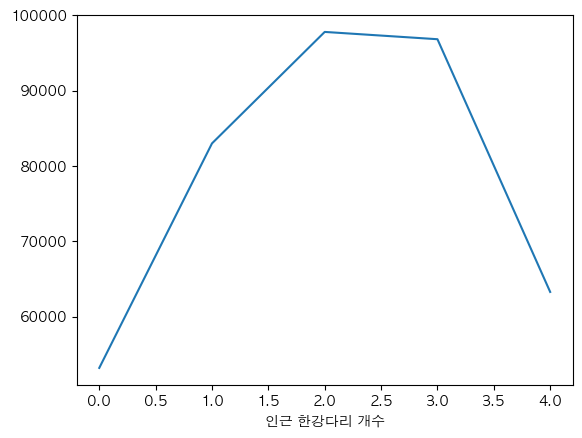

In [61]:
tmp.plot()

In [62]:
df[df['인근 한강다리 개수'] == 4]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수
21573,서울특별시 광진구 광장동,561,561.0,0.0,삼성광장1,66.03,201712,21,10,1987,...,0.996415,70.059000,기타,5호선,광진구,기타,825.078411,20.0,올림픽대교,4.0
21574,서울특별시 광진구 광장동,561,561.0,0.0,삼성광장1,66.03,201801,2,12,1987,...,1.571211,69.322000,기타,5호선,광진구,기타,825.078411,20.0,올림픽대교,4.0
21575,서울특별시 광진구 광장동,561,561.0,0.0,삼성광장1,79.53,201801,6,3,1987,...,1.571211,69.322000,기타,5호선,광진구,기타,825.078411,20.0,올림픽대교,4.0
21576,서울특별시 광진구 광장동,561,561.0,0.0,삼성광장1,79.53,201808,14,10,1987,...,0.392205,64.290800,기타,5호선,광진구,기타,825.078411,20.0,올림픽대교,4.0
21577,서울특별시 광진구 광장동,561,561.0,0.0,삼성광장1,66.03,201808,15,13,1987,...,0.392205,64.290800,기타,5호선,광진구,기타,825.078411,20.0,올림픽대교,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120910,서울특별시 광진구 광장동,554-7,554.0,7.0,현대5,59.67,202308,31,18,1989,...,-0.066770,50.991003,기타,5호선,광진구,기타,714.442418,20.0,올림픽대교,4.0
1120911,서울특별시 광진구 광장동,554-7,554.0,7.0,현대5,83.96,202309,5,2,1989,...,0.198071,51.082553,기타,5호선,광진구,기타,714.442418,20.0,올림픽대교,4.0
1120912,서울특별시 광진구 광장동,565,565.0,0.0,현대8,84.92,202307,5,18,1995,...,-0.020287,50.938744,기타,5호선,광진구,기타,952.514670,20.0,올림픽대교,4.0
1120913,서울특별시 광진구 광장동,569,569.0,0.0,현대8,84.95,202308,26,1,1996,...,-0.066770,50.991003,기타,5호선,광진구,기타,967.756410,20.0,올림픽대교,4.0


In [64]:
bridge_df.to_csv('../data/added_features/한강다리 좌표.csv', index=False)